# What are the most demanded skills for the top 3 most popular data roles?

## Methodology

1- Clean-up skill column

2- Calculate skill count based on job_title_short

3 -Plot final findings

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Filter Data for the United States


In [2]:
df_USA = df[df['job_country'] == 'United States']


Explode skills

In [3]:
df_skills = df_USA.explode('job_skills')

df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,None
785705,Data Analyst,sql
785705,Data Analyst,python


In [4]:
df_skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = df_skills_count.reset_index(name = 'skill_count')

df_skills_count.sort_values(by = 'skill_count', ascending= False, inplace= True)

df_skills_count


,job_title_short,job_skills,skill_count
886,Data Scientist,python,42379
472,Data Analyst,sql,34452
921,Data Scientist,sql,30034
351,Data Analyst,excel,27519
890,Data Scientist,r,26022
...,...,...,...
1313,Senior Data Engineer,asp.net core,1
228,Cloud Engineer,ms access,1
1020,Machine Learning Engineer,graphql,1
1582,Senior Data Scientist,mariadb,1


Create List of Top 3 Roles


In [5]:
job_titles =  df['job_title_short'].value_counts().head(3).index.to_list()

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

Plot Skill Counts

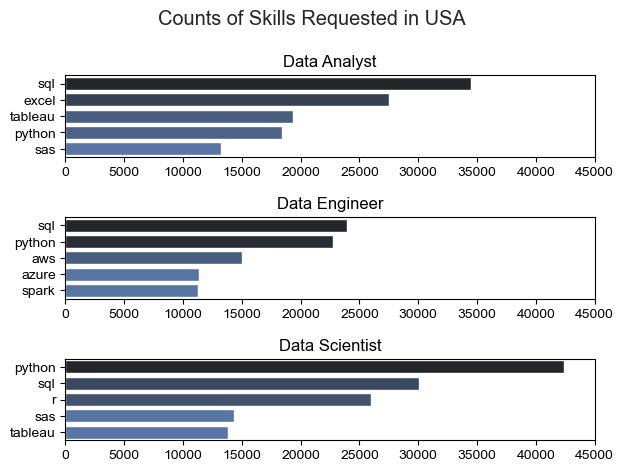

In [6]:
fig, ax =plt.subplots(3,1)

sns.set_theme(style= 'ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    sns.barplot(data= df_plot, x='skill_count', y = 'job_skills', ax= ax[i], hue='skill_count', palette='dark:b_r', legend= False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(job_title)
    ax[i].set_xlim(0,45000)

fig.suptitle('Counts of Skills Requested in USA')
fig.tight_layout()
plt.show()

Convert Counts to Percentages


In [8]:
# Use original df to get the count of job titles
df_job_title_count = df_USA['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [11]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on= 'job_title_short', how = 'left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100 

df_skills_perc

,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,42379,58830,72.036376
1,Data Analyst,sql,34452,67816,50.802171
2,Data Scientist,sql,30034,58830,51.052184
3,Data Analyst,excel,27519,67816,40.578919
4,Data Scientist,r,26022,58830,44.232534
...,...,...,...,...,...
1865,Senior Data Engineer,asp.net core,1,9289,0.010765
1866,Cloud Engineer,ms access,1,423,0.236407
1867,Machine Learning Engineer,graphql,1,921,0.108578
1868,Senior Data Scientist,mariadb,1,12946,0.007724


Plot Percentage Count


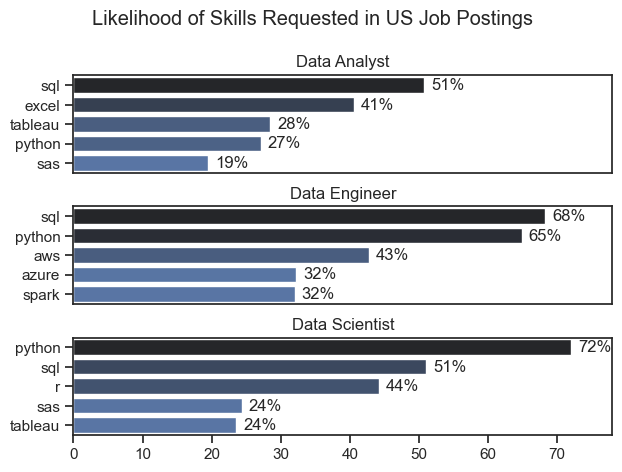

In [15]:
fig, ax =plt.subplots(3,1)

sns.set_theme(style= 'ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data= df_plot, x='skill_percent', y = 'job_skills', ax= ax[i], hue='skill_count', palette='dark:b_r', legend= False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(job_title)
    ax[i].set_xlim(0, 78)

    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])


    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')


fig.suptitle('Likelihood of Skills Requested in US Job Postings')
fig.tight_layout(h_pad=.8)
plt.show()